<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q3-PLN/blob/main/2023_Q3_PLN_AULA_14_Notebook_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

## **Introdução à API da OpenAI**
---


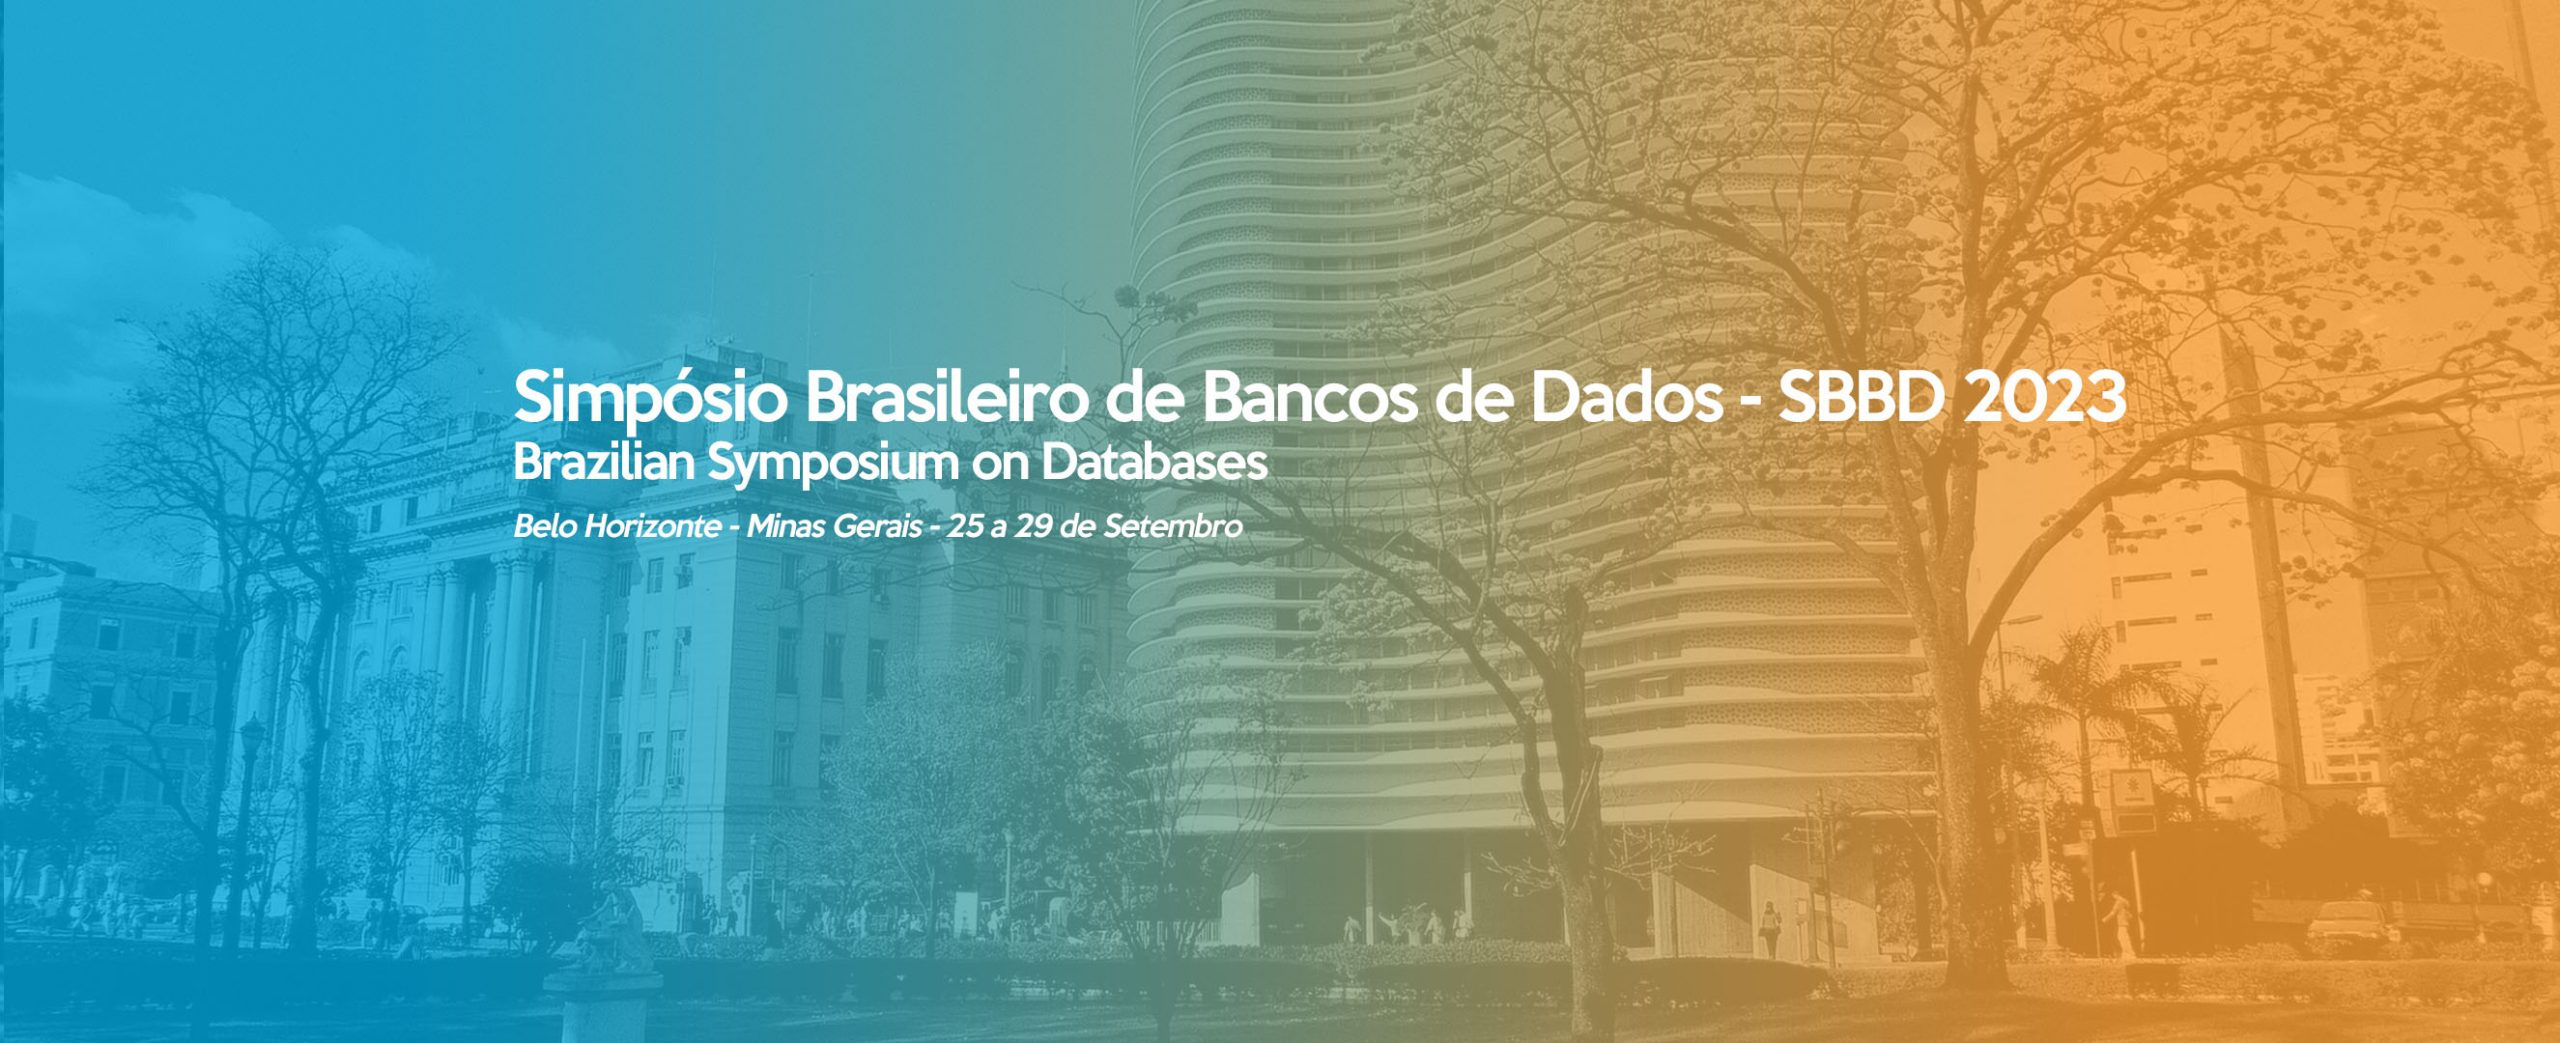

# **Minicurso: Introdução à API da OpenAI**
### Prof. Alexandre Donizeti Alves
##### Universidade Federal do ABC [UFABC]

E-mail: alexandre.donizeti@ufabc.edu.br

In [1]:
#@title Versão do Python no Google Colab

import sys

print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


## **Configuração da API**

In [3]:
#@title Instalando a biblioteca da API da OpenAI

# Listagem 1.1 - Instalação do pacote Python da API da OpenAI

print(f"Instalando a biblioteca da API da OpenAI...")

!pip install openai==0.28.1

print("API da OpenAI instalada!")

Instalando a biblioteca da API da OpenAI...
API da OpenAI instalada!


In [4]:
#@title Versão da API da OpenAI
import openai

print(openai.__version__)

0.28.1


In [5]:
  #@title Definindo a chave da API [Método 4: fazendo upload]

# Listagem 1.5 - Configuração da chave de acesso da API a partir do upload de um arquivo de texto

import openai
from google.colab import files

# fazer upload do arquivo de texto
upload_arquivo = files.upload()

# obter o nome do arquivo
nome_arquivo = list(upload_arquivo.keys())[0]

# ler o conteúdo do arquivo
with open(nome_arquivo, 'r') as file:
   chave_api = file.read()

# definir a chave da API
openai.api_key = chave_api

Saving openai_chave.txt to openai_chave.txt


In [6]:
#@title Primeiro teste

# Listagem 1.6 - Trecho de código em Python para gerar uma resposta de texto

resposta = openai.Completion.create(
   model = "text-davinci-003",
   prompt = "O Brasil é um país"
)

print(resposta.choices[0].text)

 localizado na América do Sul, limitado ao norte


## **Como utilizar a API**

### **Modelos**

In [ ]:
# Listagem 1.7 - Trecho de código em Python para listar todos os modelos disponíveis na API

# obter a lista de modelos
modelos = openai.Model.list()

# imprimir total de modelos
print(len(modelos['data']))

# imprimir os nomes dos modelos
for modelo in modelos['data']:
   print(modelo['id'])

58
text-search-babbage-doc-001
gpt-3.5-turbo-16k-0613
curie-search-query
gpt-3.5-turbo-16k
text-search-babbage-query-001
babbage
babbage-search-query
text-babbage-001
whisper-1
text-similarity-davinci-001
davinci-similarity
code-davinci-edit-001
curie-similarity
babbage-search-document
curie-instruct-beta
text-search-ada-doc-001
davinci-instruct-beta
gpt-3.5-turbo-0613
text-similarity-babbage-001
text-search-davinci-doc-001
babbage-similarity
text-embedding-ada-002
davinci-search-query
text-similarity-curie-001
text-davinci-001
text-search-davinci-query-001
ada-search-document
ada-code-search-code
babbage-002
davinci-002
davinci-search-document
curie-search-document
babbage-code-search-code
text-search-ada-query-001
code-search-ada-text-001
babbage-code-search-text
code-search-babbage-code-001
ada-search-query
ada-code-search-text
text-search-curie-query-001
text-davinci-002
text-davinci-edit-001
code-search-babbage-text-001
gpt-3.5-turbo
gpt-3.5-turbo-instruct-0914
ada
text-ada-001
ad

In [ ]:
#@title Lista de Modelos em um DataFrame

import pandas as pd

# obter a lista de modelos
modelos = openai.Model.list()

# converter a lista de modelos para um DataFrame
dados = pd.DataFrame(modelos["data"])
dados.head(10)

,id,object,created,owned_by,permission,root,parent
0,text-search-babbage-doc-001,model,1651172509,openai-dev,"[{'id': 'modelperm-s9n5HnzbtVn7kNc5TIZWiCFS', ...",text-search-babbage-doc-001,None
1,gpt-3.5-turbo-16k-0613,model,1685474247,openai,"[{'id': 'modelperm-6TvrqdxTZPTKF0DrBbCYP3sh', ...",gpt-3.5-turbo-16k-0613,None
2,curie-search-query,model,1651172509,openai-dev,"[{'id': 'modelperm-8aqdyZaKtD3MD831mGbqh1MD', ...",curie-search-query,None
3,gpt-3.5-turbo-16k,model,1683758102,openai-internal,"[{'id': 'modelperm-UTqphsmnPe8SNK52msfOjBhP', ...",gpt-3.5-turbo-16k,None
4,text-search-babbage-query-001,model,1651172509,openai-dev,"[{'id': 'modelperm-hXsRH2IK0hXmWxmLRiNTp70t', ...",text-search-babbage-query-001,None
5,babbage,model,1649358449,openai,"[{'id': 'modelperm-h574xGeqWyBeFDDKaoVTC4CO', ...",babbage,None
6,babbage-search-query,model,1651172509,openai-dev,"[{'id': 'modelperm-1zMLcaRlTvYAdpmvvixnTWlF', ...",babbage-search-query,None
7,text-babbage-001,model,1649364043,openai,"[{'id': 'modelperm-YABzYWjC1kS6M2BnI6Fr9vuS', ...",text-babbage-001,None
8,whisper-1,model,1677532384,openai-internal,"[{'id': 'modelperm-U3ME91kLaXQ3r9Vzm9l73O7P', ...",whisper-1,None
9,text-similarity-davinci-001,model,1651172505,openai-dev,"[{'id': 'modelperm-C6TT4mQR3bJQEzEuiZlhKM5u', ...",text-similarity-davinci-001,None


In [ ]:
#@title Função para verificar se um modelo existe

def verificar_modelo(nome_modelo):
   modelos = openai.Model.list()
   for modelo in modelos["data"]:
      if modelo["id"] == nome_modelo:
         return True
   return False

In [ ]:
print(verificar_modelo("text-davinci-003"))

True


In [ ]:
#@title Função para verificar se parte do nome está na lista de modelos

def verificar_modelo_parcial(parte_nome):
   modelos = openai.Model.list()
   nomes_modelos = [modelo["id"] for modelo in modelos["data"]]
   modelos_identificados = [modelo for modelo in nomes_modelos if parte_nome.lower() in modelo.lower()]

   return modelos_identificados

In [ ]:
print(verificar_modelo_parcial("gpt"))

['gpt-3.5-turbo-16k-0613', 'gpt-3.5-turbo-16k', 'gpt-3.5-turbo-0613', 'gpt-3.5-turbo', 'gpt-3.5-turbo-instruct-0914', 'gpt-3.5-turbo-0301', 'gpt-3.5-turbo-instruct']


### **Requisições HTTP**

In [ ]:
#@title Endpoint *Completions*

# Listagem 1.8 - Trecho de código em Python para fazer uma requisição HTTP utilizando o endpoint “completions”

import requests

# definir o modelo
modelo = "text-davinci-003"

# definir o endpoint da API
endpoint = "https://api.openai.com/v1/engines/" + modelo + "/completions"

# definir os parâmetros e cabeçalho da requisição
parametros = {
    "prompt": "Qual é a capital do Brasil?",
    "temperature": 0.7,
    "max_tokens": 100
}
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {openai.api_key}"
}

# fazer a requisição
resposta = requests.post(endpoint, json=parametros, headers=headers)

In [ ]:
# Listagem 1.9 - Trecho de código para mostrar a resposta no formato JSON

# formato json
resposta.json()

{'warning': 'This model version is deprecated. Migrate before January 4, 2024 to avoid disruption of service. Learn more https://platform.openai.com/docs/deprecations',
 'id': 'cmpl-8GEv5kqOeUlWOQdqNzudPID41BvOB',
 'object': 'text_completion',
 'created': 1698881291,
 'model': 'text-davinci-003',
 'choices': [{'text': '\n\nA capital do Brasil é Brasília.',
   'index': 0,
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 8, 'completion_tokens': 12, 'total_tokens': 20}}

In [ ]:
# formato texto - str
print(resposta.text)

{
  "warning": "This model version is deprecated. Migrate before January 4, 2024 to avoid disruption of service. Learn more https://platform.openai.com/docs/deprecations",
  "id": "cmpl-8GBIdt6TPQ0ZvmBRWcBICF1kNivZl",
  "object": "text_completion",
  "created": 1698867375,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nBrasília é a capital do Brasil.",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 8,
    "completion_tokens": 13,
    "total_tokens": 21
  }
}



In [ ]:
# Listagem 1.10 - Trecho de código em Python para mostrar apenas o texto da resposta

print(resposta.json()["choices"][0]["text"].strip())

A capital do Brasil é Brasília.


In [ ]:
#@title Endpoint *Chat Completions* (Análise de Sentimentos)

# Listagem 1.11 - Código em Python para fazer uma requisição HTTP utilizando o endpoint “chat completions”

import requests

endpoint = "https://api.openai.com/v1/chat/completions"

mensagem_sistema = 'Você é um assistente que analisa sentimentos de avaliações de produtos'
mensagem_usuario = "Aqui está uma avaliação de um produto: 'Este produto é incrível!"
mensagem_assistente = "Classifique o sentimento retornando apenas 'Positivo' ou 'Negativo'. "

parametros = {
   "model": "gpt-3.5-turbo-0613",
   "messages": [
      {"role": "system", "content": mensagem_sistema},
      {"role": "user", "content": mensagem_usuario},
      {"role": "assistant", "content": mensagem_assistente}]
}
headers = {
   "Content-Type": "application/json",
   "Authorization": f"Bearer {openai.api_key}"
}

resposta = requests.post(endpoint, json=parametros, headers=headers)
resposta.json()

{'id': 'chatcmpl-8GFAccp3Z9ukHFWc9drlyTvDdjW9V',
 'object': 'chat.completion',
 'created': 1698882254,
 'model': 'gpt-3.5-turbo-0613',
 'choices': [{'index': 0,
   'message': {'role': 'assistant', 'content': 'Positivo'},
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 67, 'completion_tokens': 3, 'total_tokens': 70}}

In [ ]:
# imprimir apenas resposta do assistente
print(resposta.json()["choices"][0]["message"]["content"])

Positivo


### **Utilizando a biblioteca da *API***

In [ ]:
#@title *Completions*

# Listagem 1.12 - Trecho de código em Python utilizando a biblioteca da API com o endpoint “completions”

resposta = openai.Completion.create(
   model = "text-davinci-003",
   prompt = "Qual é a capital do Brasil?",
   temperature = 0.7,
   max_tokens = 100
)

print(resposta.choices[0].text.strip())

Brasília é a capital do Brasil.


In [ ]:
# Listagem 1.13 - Trecho de código para mostrar a resposta no formato JSON

resposta

<OpenAIObject text_completion id=cmpl-8GBJFPaFU8eOWrTmI6UJsaFmrdGSi at 0x7e5fecacd030> JSON: {
  "warning": "This model version is deprecated. Migrate before January 4, 2024 to avoid disruption of service. Learn more https://platform.openai.com/docs/deprecations",
  "id": "cmpl-8GBJFPaFU8eOWrTmI6UJsaFmrdGSi",
  "object": "text_completion",
  "created": 1698867413,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nA capital do Brasil \u00e9 Bras\u00edlia.",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 8,
    "completion_tokens": 12,
    "total_tokens": 20
  }
}

In [ ]:
# id
print(resposta.openai_id)

cmpl-8GBJFPaFU8eOWrTmI6UJsaFmrdGSi


In [ ]:
# id
print(resposta.id)

cmpl-8GBJFPaFU8eOWrTmI6UJsaFmrdGSi


In [ ]:
# modelo
print(resposta.model)

text-davinci-003


In [ ]:
# total de tokens
print(resposta.usage.total_tokens)

20


In [ ]:
#@title *Chat Completions* (Correção Gramatical)

mensagem_sistema = 'Você receberá instruções e sua tarefa é corrigir para o Português'
mensagem_usuario = "o mecado estava fexado."

resposta = openai.ChatCompletion.create(
   model = "gpt-3.5-turbo",
   messages = [{"role": "system", "content": mensagem_sistema},
               {"role": "user", "content": mensagem_usuario}]
)

print(resposta["choices"][0]["message"]["content"])

O mercado estava fechado.


In [ ]:
resposta

<OpenAIObject chat.completion id=chatcmpl-8GBJgTbJ1YxmSjRADyU8cKTVzB9Th at 0x7e5fa1fabe70> JSON: {
  "id": "chatcmpl-8GBJgTbJ1YxmSjRADyU8cKTVzB9Th",
  "object": "chat.completion",
  "created": 1698867440,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "O mercado estava fechado."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 38,
    "completion_tokens": 7,
    "total_tokens": 45
  }
}

In [ ]:
# id
print(resposta.openai_id)

chatcmpl-8GBJgTbJ1YxmSjRADyU8cKTVzB9Th


In [ ]:
# id
print(resposta.id)

chatcmpl-8GBJgTbJ1YxmSjRADyU8cKTVzB9Th


In [ ]:
# modelo
print(resposta.model)

gpt-3.5-turbo-0613


In [ ]:
# total de tokens
print(resposta.usage.total_tokens)

45
